In [1]:
%matplotlib inline

import bioscrape as bs
import libsbml
from bioscrape.lineage import py_SimulateInteractingCellLineage
from bioscrape.lineage import py_SimulateSingleCell

from bioscrape.lineage import LineageModel
import numpy as np
import pylab as plt

#Number of cells
N = 20

sbml_file_path = "C:\\Users\\wp_ix\\OneDrive\\Caltech\\Code\\bioscrape lineages\\sbml models\\"
f1 = "cell_to_cell_comm_model_1.xml"
f2 = "cell_to_cell_comm_model_2.xml"
f5 = "cell_to_cell_comm_model_5.xml"
f20 = "cell_to_cell_comm_model_10.xml"
f100 = "cell_to_cell_comm_model_100.xml"

sbml_file1 = sbml_file_path+f1
if N == 1:
    sbml_file2 = sbml_file_path+f1
elif N == 2:
    sbml_file2 = sbml_file_path+f2
elif N == 5:
    sbml_file2 = sbml_file_path+f5
elif N == 20:
    sbml_file2 = sbml_file_path+f20
elif N == 100:
    sbml_file2 = sbml_file_path+f100
else:
    raise ValueError("Invalid Value of N")

M1 = LineageModel(sbml_filename = sbml_file1)
M2 = LineageModel(sbml_filename = sbml_file2)

print(M2.get_species())

timepoints = np.arange(0, 50, .001)

results2 = py_SimulateSingleCell(timepoints, Model = M2)
data_crn = results2
print(data_crn.shape)

print(timepoints[-1])
global_sync_period = .01
lineage = py_SimulateInteractingCellLineage(timepoints, global_sync_period, models = [M1], initial_cell_states = [N], global_species = ["A", "B"], global_species_method = 3)
data_approx = []
print("lineages returned:", lineage.py_size())
for i in range(lineage.py_size()):
    sch = lineage.py_get_schnitz(i)
    data_approx.append(sch.py_get_dataframe(Model = M1))
    t = sch.py_get_time()
    print("i=", i, "t0=", t[0], "tf=", t[1], "len(t)=", len(t))#, t.shape, t)
    #for j in range(6):
        #print("\tj=", j ,sch.py_get_data()[:, j])
print([data_approx[i].shape for i in range(N)])








AttributeError: 'NoneType' object has no attribute 'getListOfReactions'

(0, 25)

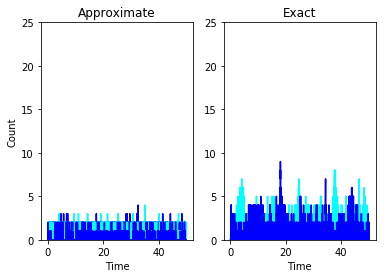

In [6]:
plt.figure()
color_list = ["cyan", "blue"]
plt.subplot(121)
plt.title("Approximate")
plt.xlabel("Time")
plt.ylabel("Count")
plt.ylim(0, 25)
meanA_approx = 0
for i in range(lineage.py_size()):
    plt.plot(timepoints, data_approx[i]["A"], color = color_list[0])
    plt.plot(timepoints, data_approx[i]["B"], color = color_list[1])


plt.subplot(122)
plt.title("Exact")
plt.plot(timepoints, data_crn["A_1_combined"], color = color_list[0])
plt.plot(timepoints, data_crn["B_1_combined"], color = color_list[1])
plt.xlabel("Time")
plt.ylim(0, 25)
